<a href="https://colab.research.google.com/github/Jvab1609/FCMP_5-sem/blob/main/Intelig%C3%AAncia%20Artificial/Regress%C3%A3o%20Linear%20Simples/simple_linear_regression_cb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Simple Linear Regression

## 1. Exploring the Data


Dummy dataset created to study simple linear regression. <br/>
https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression
    
The file considered in this notebook corresponds to such a dataset only with the shuffled lines.

### 1.1. Importing the Dataset

In [10]:
df = pd.read_csv('/content/sample_data/experience_salary_dataset.csv')

In [11]:
df

,YearsExperience,Salary
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0
5,2.9,56642.0
6,4.0,56957.0
7,3.9,63218.0
8,3.2,54445.0
9,3.2,64445.0


In [12]:
df.head() # mostra as 5 primeiras linhas

,YearsExperience,Salary
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0


In [13]:
df.shape # Mostra o número de linhas e colunas do dataframe

(30, 2)

In [14]:
df.columns = ['Experience', 'Salary'] # Mudar o nome das colunas

### 1.2. Basic Information about the Dataset

In [15]:
print(f'This dataset has {df.shape[0]} observations/samples/rows and {df.shape[1]} attributes/features/colunas')

This dataset has 30 observations/samples/rows and 2 attributes/features/colunas


In [16]:
df.info() # Saber se o dataframe está balanceado (mesmo número de linhas em cada atributo) ou não; tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  30 non-null     float64
 1   Salary      30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


### 1.3. Descriptive Statistics

In [17]:
df.describe()
# std = desvio padrão
# mean = média

,Experience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: title={'center': 'Boxplot - Salary ($)'}, ylabel='Salary (Annual)'>

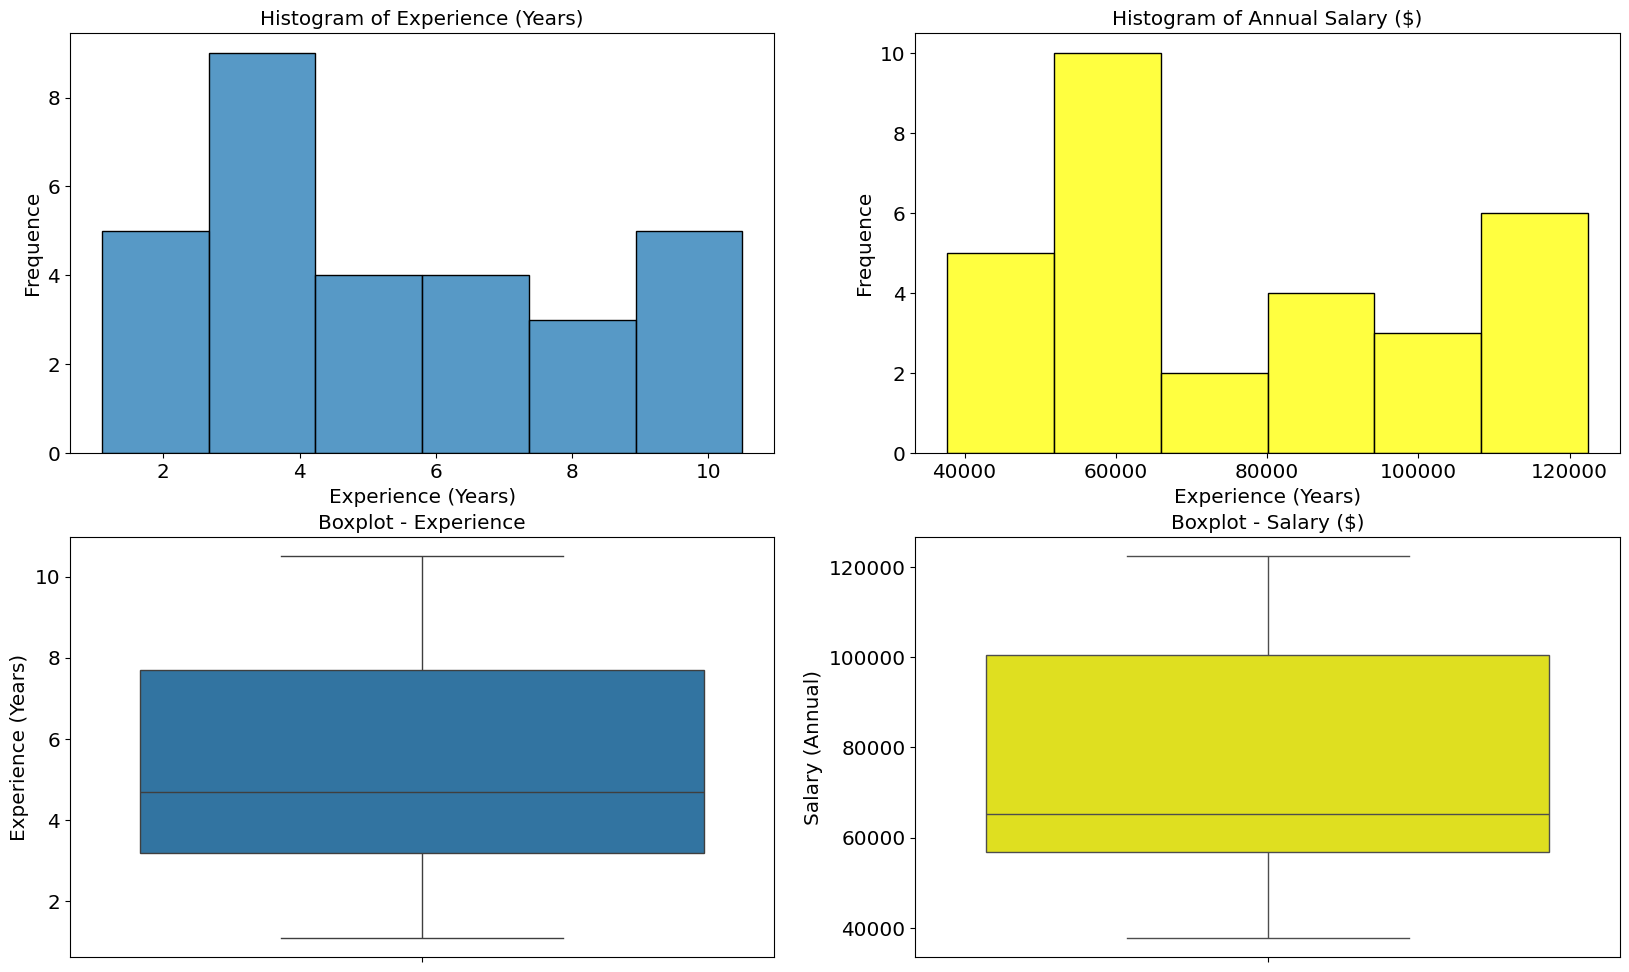

In [18]:
fig = plt.figure(figsize=(20, 12))

axis_1 = fig.add_subplot(2, 2, 1)
axis_1.set_title('Histogram of Experience (Years)')
axis_1.set_xlabel('Experience (Years)')
axis_1.set_ylabel('Frequence')
sns.histplot(data=df, x='Experience', ax=axis_1)

axis_2 = fig.add_subplot(2, 2, 2)
axis_2.set_title('Histogram of Annual Salary ($)')
axis_2.set_xlabel('Experience (Years)')
axis_2.set_ylabel('Frequence')
sns.histplot(data=df, x='Salary', ax=axis_2, color="yellow")

axis_3 = fig.add_subplot(2, 2, 3)
axis_3.set_title('Boxplot - Experience')
axis_3.set_ylabel('Experience (Years)')
sns.boxplot(data=df, y='Experience', orient='v', ax=axis_3)

axis_4 = fig.add_subplot(2, 2, 4)
axis_4.set_title('Boxplot - Salary ($)')
axis_4.set_ylabel('Salary (Annual)')
sns.boxplot(data=df, y='Salary', orient='v', color="yellow", ax=axis_4)

### 1.4 Correlation Matrix

The **correlation coefficient** measures the _linear association_ between two variables. Its value ranges from **_-1_** (perfect negative association) and **_+1_** (perfect positive association).
<img src="imgs/correlation_coefficient.png" width="70%" />

Source: https://dataz4s.com/statistics/correlation-coefficient/

<Axes: xlabel='Experience', ylabel='Salary'>

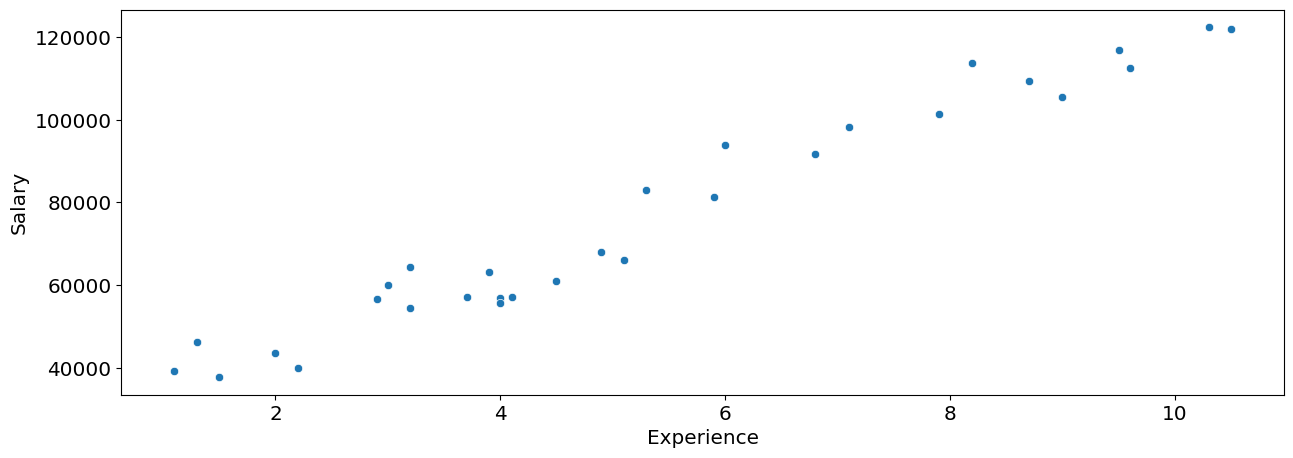

In [19]:
sns.scatterplot(data=df, x='Experience', y='Salary') # Permite visualizar a relação entre os meus dados
# Isso me possibilita decidir qual o melhor modelo

In [20]:
df.corr() # Mostra o grau de correlação entre os dados

,Experience,Salary
Experience,1.000000,0.978242
Salary,0.978242,1.000000


## 2. Dependent Variable (y) vs Independent Variables

### `pairplot`

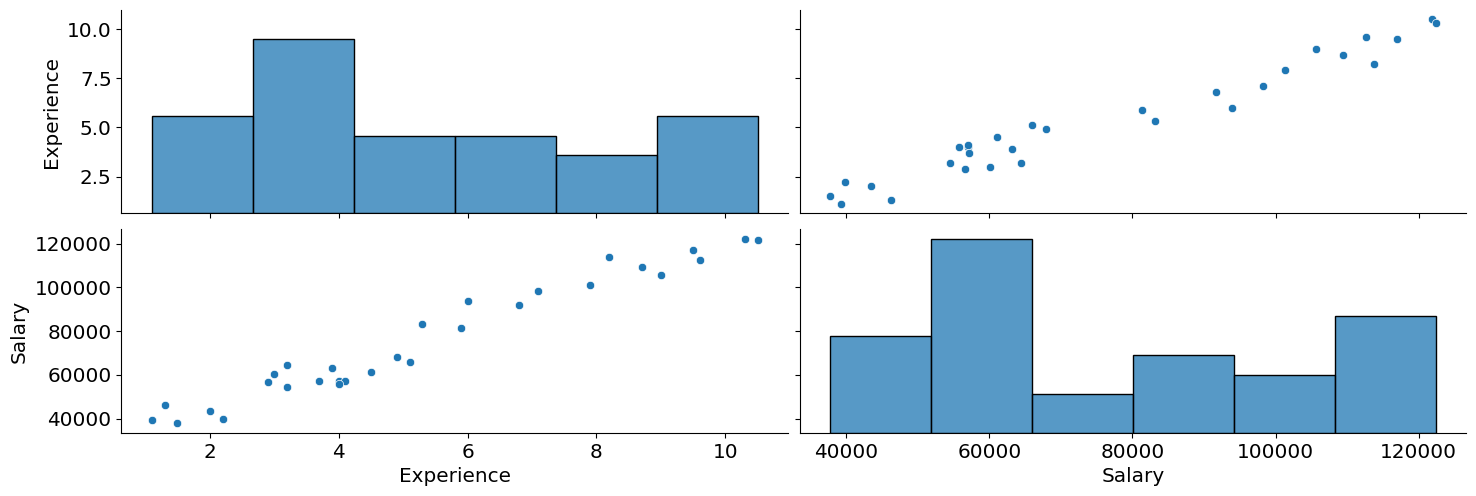

In [21]:
sns.pairplot(df, aspect=3) # junta o gráfico de correlação e o de histograma

### `jointplot`

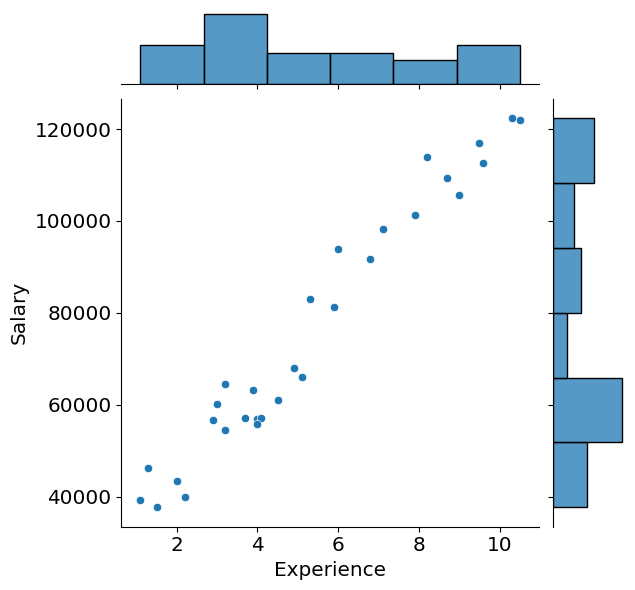

In [22]:
sns.jointplot(data=df, x='Experience', y='Salary')

### `jointplot` with the estimated regression line

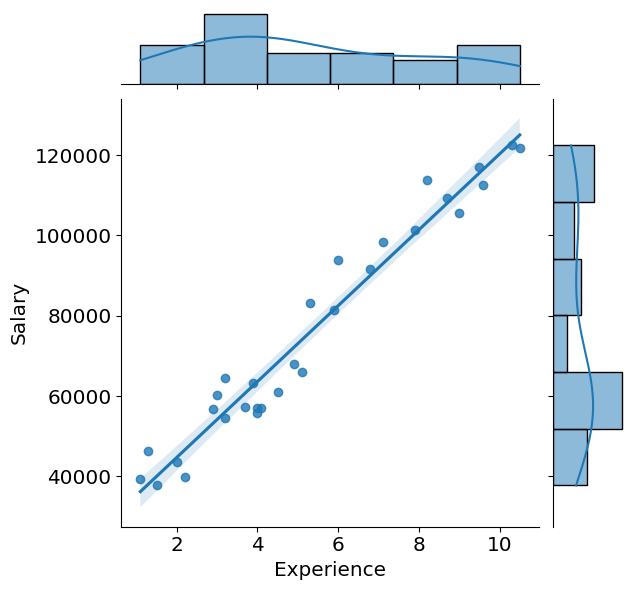

In [23]:
sns.jointplot(data=df, x='Experience', y='Salary', kind='reg')

### `lmplot`
Plots the regression line between two variables together with their respective dispersions.

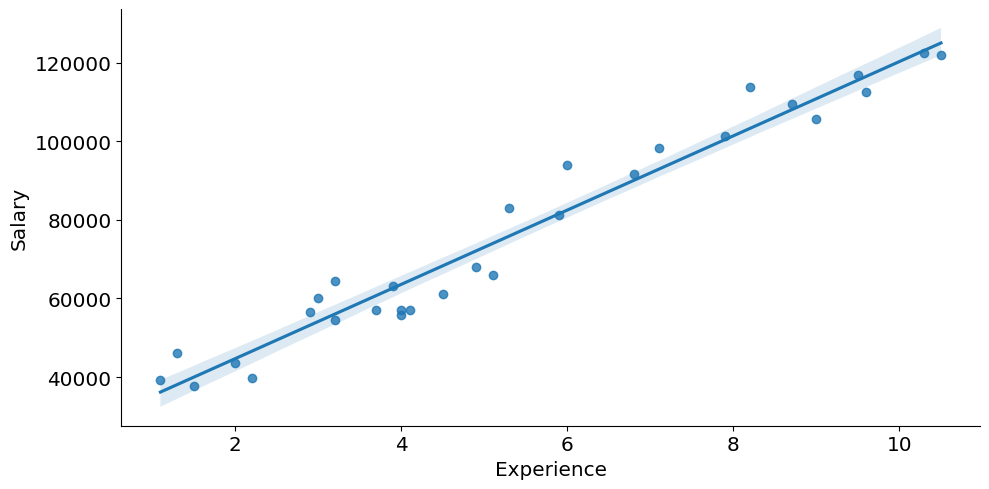

In [24]:
sns.lmplot(data=df, x='Experience', y='Salary', aspect=2)

## 3. Estimating a Linear Regressor


### 3.1. Extracting the independent and dependent variables

In [25]:
df.head()

,Experience,Salary
0,8.7,109431.0
1,5.3,83088.0
2,9.0,105582.0
3,6.0,93940.0
4,9.6,112635.0


#### Creating a DataFrame to store the independent/explanatory variables: Feature Matrix (X)
NB: we could use a numpy array instead.

In [26]:
X = df[['Experience']] # 2 colchetes para pegar como dataframe
X

,Experience
0,8.7
1,5.3
2,9.0
3,6.0
4,9.6
5,2.9
6,4.0
7,3.9
8,3.2
9,3.2


In [27]:
X_npy = X.values # Converter de DataFrame para array numpy, p/ não dar erro nos cálculos
X_npy

array([[ 8.7],
       [ 5.3],
       [ 9. ],
       [ 6. ],
       [ 9.6],
       [ 2.9],
       [ 4. ],
       [ 3.9],
       [ 3.2],
       [ 3.2],
       [ 2.2],
       [ 5.9],
       [ 4.1],
       [ 3. ],
       [ 5.1],
       [10.5],
       [ 1.5],
       [ 1.1],
       [ 2. ],
       [ 8.2],
       [ 3.7],
       [ 9.5],
       [ 1.3],
       [ 4. ],
       [ 6.8],
       [ 4.9],
       [ 4.5],
       [10.3],
       [ 7.1],
       [ 7.9]])

#### Creating a Series to store the dependent variable (y)

In [28]:
y = df['Salary']
y

,Salary
0,109431.0
1,83088.0
2,105582.0
3,93940.0
4,112635.0
5,56642.0
6,56957.0
7,63218.0
8,54445.0
9,64445.0


In [29]:
y_npy = y.values
y_npy

array([109431.,  83088., 105582.,  93940., 112635.,  56642.,  56957.,
        63218.,  54445.,  64445.,  39891.,  81363.,  57081.,  60150.,
        66029., 121872.,  37731.,  39343.,  43525., 113812.,  57189.,
       116969.,  46205.,  55794.,  91738.,  67938.,  61111., 122391.,
        98273., 101302.])

### 3.2 Splitting the dataset into Training Set and Test Set
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42) # dividir os dados entre treino e teste para a IA

#### Checking training and test set sizes

In [32]:
print(f'X_train.shape = {X_train.shape}')
print(f'Y_train.shape = {y_train.shape}')

X_train.shape = (24, 1)
Y_train.shape = (24,)


In [33]:
print(f'X_test.shape = {X_test.shape}')
print(f'y_test.shape = {y_test.shape}')

X_test.shape = (6, 1)
y_test.shape = (6,)


### 3.3. Training the Simple Linear Regression Model with the Training Set
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression()
reg

LinearRegression()

In [36]:
reg.fit(X_train, y_train) # ajuste à divisão de treino e teste (nesse contexto, significa treinar)

LinearRegression()

In [37]:
reg.intercept_ # theta_0 -> coeficiente linear

np.float64(24568.367141463837)

In [38]:
reg.coef_ # theta_1 -> coeficiente angular

array([9694.40746345])

A partir do conjunto de treinamento estabelecido, nossa reta é então: <br/>
**h(x) = 24568.367141463837 + 9694.4074634 * x**

The predicted annual salary of an **inexperienced (zero years of experience)** employee is \\$24,568.36 (intercept $ \theta_0 $).

**For each additional year of experience**, the employee's annual salary increases by \\$9,694.4 (slope of the line - $ \theta_1 $).

## 3.4 Coefficient of determination (R²) of the linear model estimated with the Training Set

The coefficient of determination (R²) is a summary measure that tells you _how well the regression line fits the data_. <br/>
The coefficient of determination (R²) measures how well a _statistical model_ predicts an _outcome_. The _outcome_ is represented by the _model’s dependent variable_. <br/>
It is a value (generally) between 0 and 1.

It represents the _proportion of total variability_ of the $y$-value that is accounted for by the **independent variable $x$**.

Eg R² = 0.8234 means that the linear model explains 82.34% of the variance of the dependent variable from the regressors (independent variables) included in that linear model.

Broadly speaking:

| **Coefficient of determination (R²)** | **Interpretation**                            |
|---------------------------------------|-----------------------------------------------|
| 0                                     | The model **does not** predict the outcome.   |
| Between 0 and 1                       | The model **partially** predicts the outcome. |
| 1                                     | The model **perfectly** predicts the outcome. |

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=1}^{m}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^{m}(y^{(i)}-\bar{y})^2}$$

In [39]:
print(f'R² = {reg.score(X_train, y_train)}')
# se chegar acima de 95% de acurácia, tem algo de errado!
# É como se o modelo estivesse "decorando a informação"

R² = 0.949016663016664


## 4. Predicting Salaries for Test Samples

### 4.1. Prediction

In [40]:
X_test

,Experience
27,10.3
15,10.5
23,4.0
17,1.1
8,3.2
9,3.2


In [41]:
y_test

,Salary
27,122391.0
15,121872.0
23,55794.0
17,39343.0
8,54445.0
9,64445.0


In [42]:
y_pred = reg.predict(X_test)
y_pred

array([124420.76401503, 126359.64550772,  63345.99699528,  35232.21535126,
        55590.47102451,  55590.47102451])

In [43]:
type(y_pred)

numpy.ndarray

In [44]:
y_pred.shape

(6,)

In [45]:
results = pd.DataFrame({
    'Experience (Years)': X_test['Experience'],
    'Salary (Prediction)': y_pred.round(2),
    'Salary (True)': y_test.round(2),
    'Erro (Residual)': (y_test - y_pred).round(2),
    'Erro (Absolute)': abs(y_test - y_pred).round(2)
})
# montando um dataframe para exibir meus resultados de forma mais elegante
results

,Experience (Years),Salary (Prediction),Salary (True),Erro (Residual),Erro (Absolute)
27,10.3,124420.76,122391.0,-2029.76,2029.76
15,10.5,126359.65,121872.0,-4487.65,4487.65
23,4.0,63346.00,55794.0,-7552.00,7552.00
17,1.1,35232.22,39343.0,4110.78,4110.78
8,3.2,55590.47,54445.0,-1145.47,1145.47
9,3.2,55590.47,64445.0,8854.53,8854.53


The **residuals** inform how far the predictions are from the linear model.

In [46]:
results.describe() # informações estatísticas

,Experience (Years),Salary (Prediction),Salary (True),Erro (Residual),Erro (Absolute)
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,5.383333,76756.595000,76381.666667,-374.928333,4696.698333
std,4.003707,38813.562482,36347.339334,5950.823807,3018.313967
min,1.100000,35232.220000,39343.000000,-7552.000000,1145.470000
25%,3.200000,55590.470000,54782.250000,-3873.177500,2550.015000
50%,3.600000,59468.235000,60119.500000,-1587.615000,4299.215000
75%,8.725000,109152.070000,107515.250000,2796.717500,6785.912500
max,10.500000,126359.650000,122391.000000,8854.530000,8854.530000


### 4.2. Visualizing the samples with the Linear Models

In [47]:
regression_line_x = X['Experience']
regression_line_y = reg.predict(X)
regression_line_y

array([108909.7120735 ,  75948.72669776, 111818.03431254,  82734.81192218,
       117634.67879061,  52682.14878548,  63345.99699528,  62376.55624893,
        55590.47102451,  55590.47102451,  45896.06356106,  81765.37117584,
        64315.43774162,  53651.58953182,  74009.84520507, 126359.64550772,
        39109.97833664,  35232.21535126,  43957.18206837, 104062.50834178,
        60437.67475624, 116665.23804427,  37171.09684395,  63345.99699528,
        90490.33789294,  72070.96371238,  68193.200727  , 124420.76401503,
        93398.66013198, 101154.18610274])

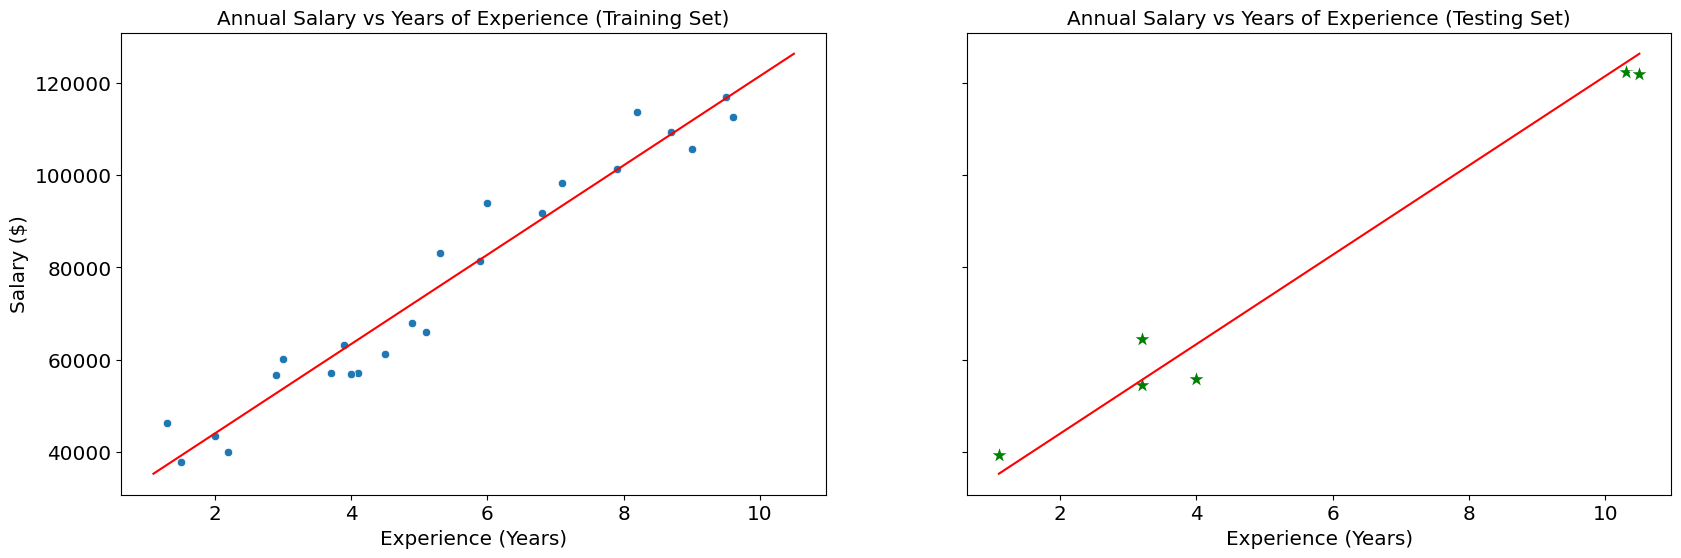

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharex=True, sharey=True)

regression_line_x = X['Experience']
regression_line_y = reg.predict(X)

sns.scatterplot(x=X_train['Experience'], y=y_train, ax=axs[0])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[0])
axs[0].set_title('Annual Salary vs Years of Experience (Training Set)')
axs[0].set_xlabel('Experience (Years)')
axs[0].set_ylabel('Salary ($)')

sns.scatterplot(x=X_test['Experience'], y=y_test, color="green", marker='*', s=200, ax=axs[1])
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red", ax=axs[1])
axs[1].set_title('Annual Salary vs Years of Experience (Testing Set)')
axs[1].set_xlabel('Experience (Years)')
axs[1].set_ylabel('Salary ($)')

display()

In [49]:
X_labeled = X.copy()
X_labeled['Label'] = 'Train'
X_labeled
X_labeled.loc[X_test.index, 'Label'] = 'Test'
X_labeled

,Experience,Label
0,8.7,Train
1,5.3,Train
2,9.0,Train
3,6.0,Train
4,9.6,Train
5,2.9,Train
6,4.0,Train
7,3.9,Train
8,3.2,Test
9,3.2,Test


Text(0, 0.5, 'Salary ($)')

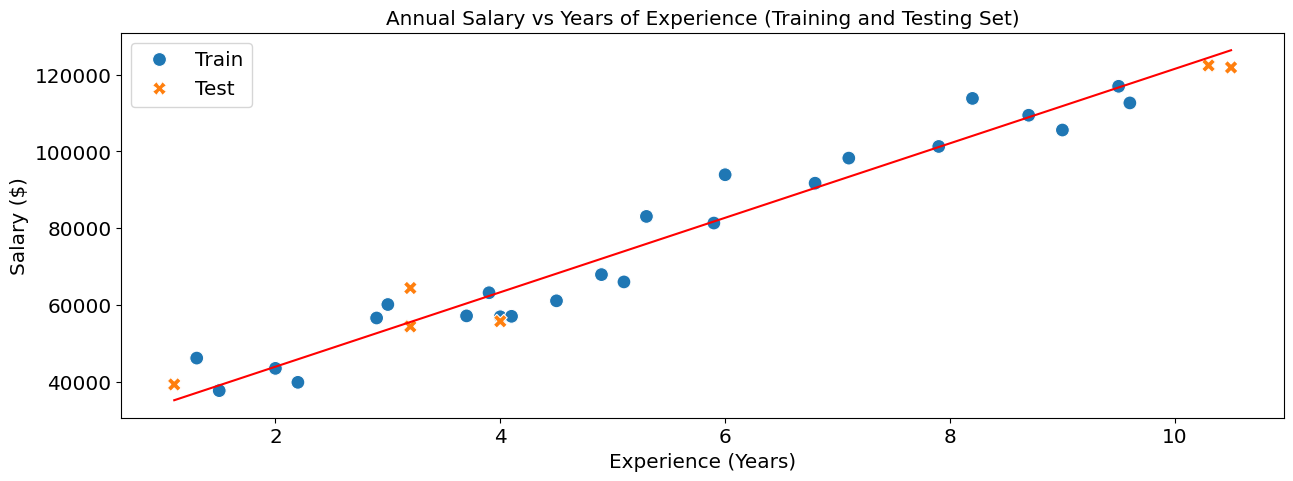

In [50]:
sns.scatterplot(data=X_labeled, x='Experience', y=y, hue='Label', style='Label', s=100)
sns.lineplot(x=regression_line_x, y=regression_line_y, color="red")
plt.title('Annual Salary vs Years of Experience (Training and Testing Set)')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary ($)')

## 5. Computing Evaluation Metrics

How much do the predictions obtained differ from the actual data?

### Mean Absolute Error (MAE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

$$ MAE = \frac{1}{m}\sum_{i=1}^{m}|y^{(i)} - \hat{y}^{(i)}| $$

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

4696.698527793701

### Mean Squared Error (MSE)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)} - \hat{y}^{(i)})^2 $$

Since the **errors** are squared before computing the _mean_, MSE weights **large errors** more than the MAE.

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
MSE = mean_squared_error(y_test, y_pred)
MSE

29650816.74172468

## Root Mean Squared Error (RMSE)
Square root of the MSE. <br/>
This is the metric commonly used to compare regression models.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [55]:
from sklearn.metrics import root_mean_squared_error

In [56]:
RMSE_manually = np.sqrt(MSE)
RMSE_manually

np.float64(5445.256352250524)

In [57]:
RMSE = root_mean_squared_error(y_test, y_pred)
RMSE

5445.256352250524

##R2

In [58]:
reg.score(X_test, y_test)

0.9730677488532432

In [59]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9730677488532432

# Exercise

Consider the dataset below that contains **heights** (in inches/inches) and **weights** (in pounds/lbs) of fake people. <br/>
https://www.kaggle.com/mustafaali96/weight-height

Perform the following tasks:
- Split the dataset into 80% for training and 20% for testing
- Compute the correlation between the training set variables
- Train a regression model considerint **height** as the independent variable and **weight** as the dependent one
   + Compute the model determination coefficient
   + Plot a scatterplot of the two variables containing the regression model (line)
- Predict the test set
   + Plot a scatterplot of the two variables containing the regression model (line)
   + Compute error metrics for regression

**Exercício no [arquivo correspondente](https://colab.research.google.com/drive/1YISw-jp0aceVrXet9LeCwCzytmYMAQQH?usp=sharing)**